# Use Deep Neural Network to predict written numbers

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from keras.utils import to_categorical
print("TensorFlow version:", tf.__version__)
from sklearn.model_selection import train_test_split

TensorFlow version: 2.15.0


In [2]:
digits = datasets.load_digits()

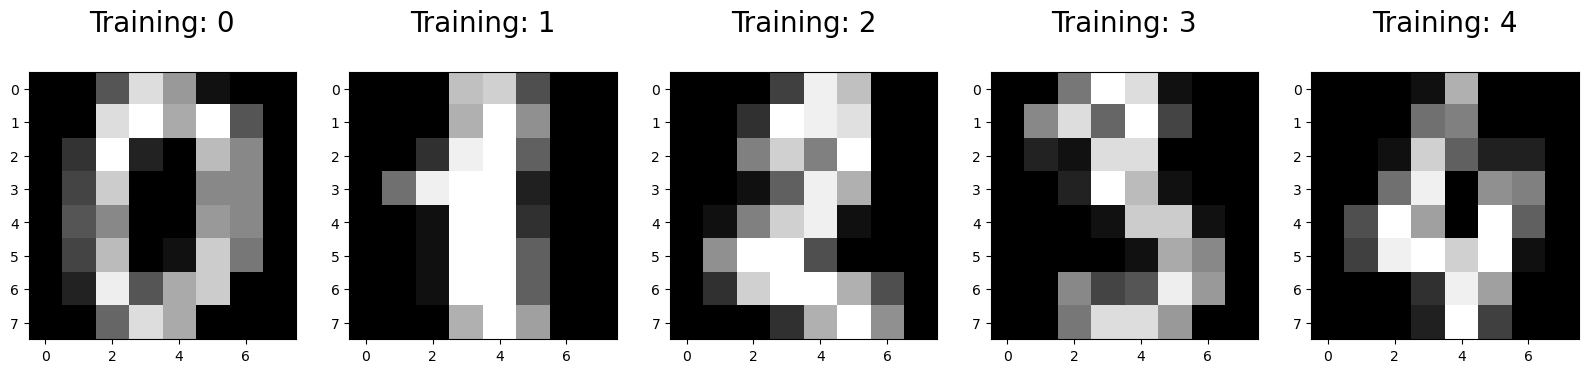

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [4]:
print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


In [5]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# hints

- do you need to flatten images?
- how first row of data looks like?
- perform train-test split
- do you need to encode the y?
- do you need to scale the data?
- what is the shape of input data?
- build a model structure (use Sequential())
- pick loss, optimalizators, metrics
- compile model
- fit model (you can assign this to variable for sake of visualization)
- evaluate model
- optional: vizualize loss and accuracy on plots
- optional: vizualize confusion matrix, classification report (use np.argmax to retrieve the highest probability from predictions)

# Prevent Overfitting - Data Augmentation

### You can use layers or ImageDataGenerator
https://www.tensorflow.org/datasets/catalog/mnist

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import mnist
datagen = ImageDataGenerator()

(60000, 28, 28)
(60000,)
[5 0 4 1 9 2 1 3 1 4]


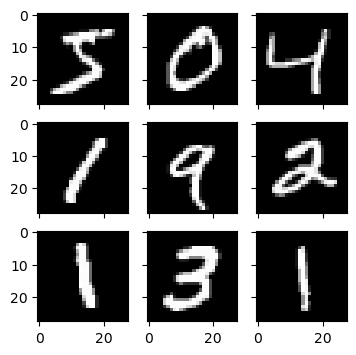

In [7]:
# load dbata
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(y_train[:10])
# create a grid of 3x3 images
fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X_train[i*3+j], cmap=plt.get_cmap("gray"))
# show the plot
plt.show()

## Normalization, encode, reshape

In [8]:
X_train = X_train.astype('float32') / 255.0 # Rescale pixel values to [0, 1]
X_test = X_test.astype('float32') / 255.0

# encode using keras.utils.to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

-0.42407304 -0.040938165 2.821534


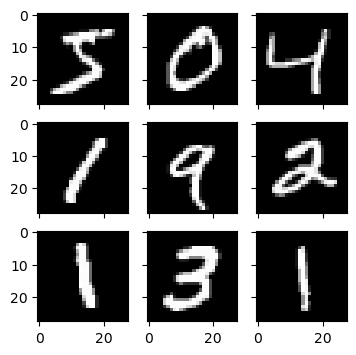

In [9]:
from keras.preprocessing.image import ImageDataGenerator

# Feature Standardization
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j], cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

## ZCA whitening
#### A whitening transform of an image is a linear algebraic operation that reduces the redundancy in the matrix of pixel images.
#### Less redundancy in the image is intended to better highlight the structures and features in the image to the learning algorithm.

-12.411124 0.0034854603 17.104145


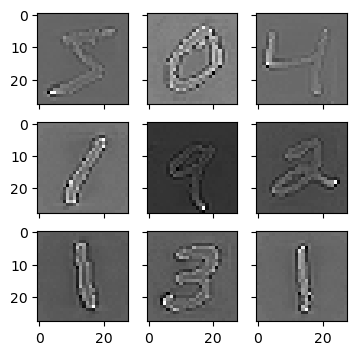

-7.0657487 0.009596058 22.853634


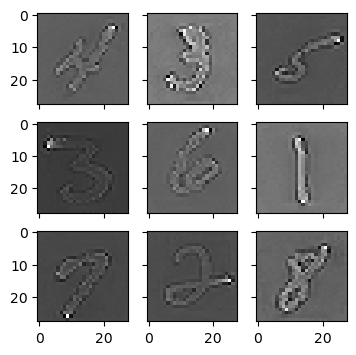

-5.503799 -0.007120297 19.102665


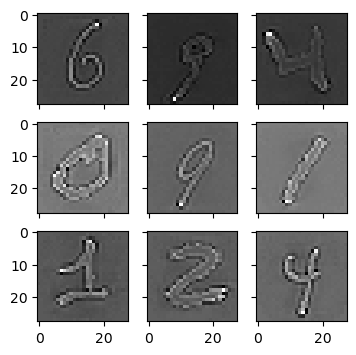

-18.053032 0.014052477 36.573284


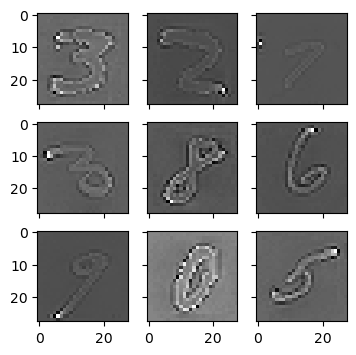

-4.7564282 -0.007874352 7.7654343


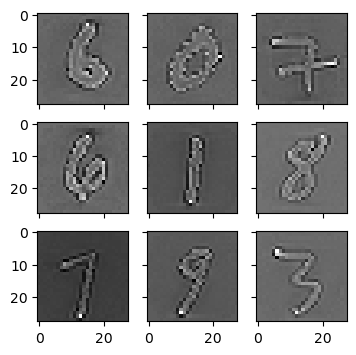

-6.485697 0.009043849 12.8474245


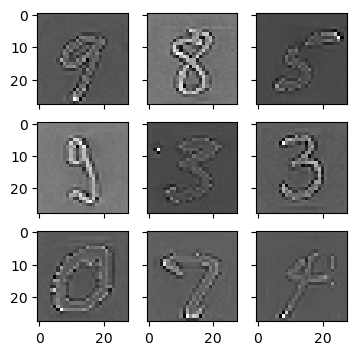

-6.709514 0.010467967 9.958365


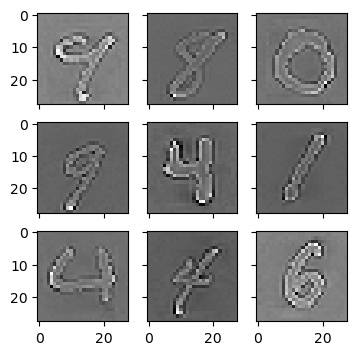

-26.333538 0.022659108 56.15164


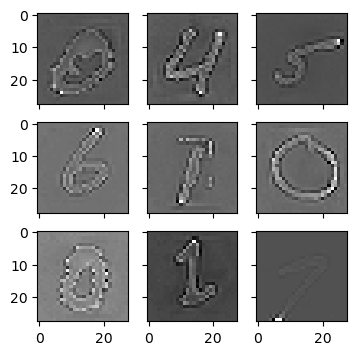

-8.232124 0.0028581826 18.933409


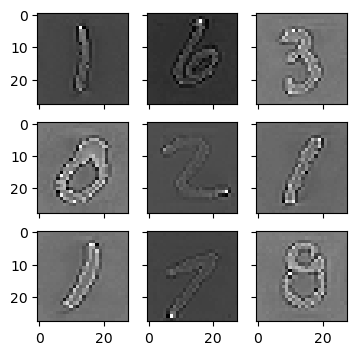

-10.275474 0.018668085 25.742462


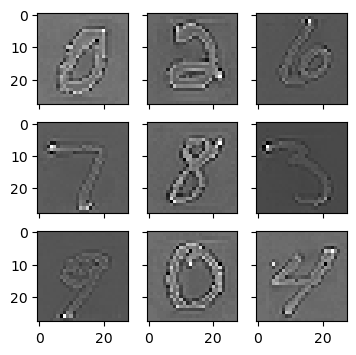

-114.55208 0.0137575455 110.444214


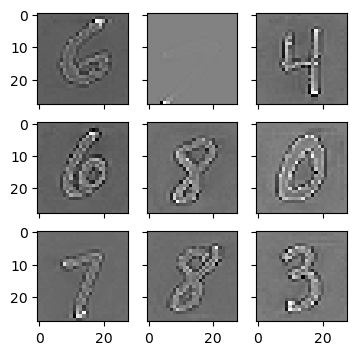

-14.427611 -0.00961419 27.362806


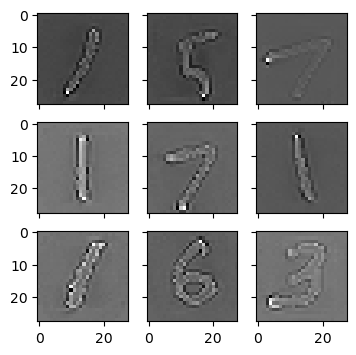

-20.615314 0.01710017 48.04591


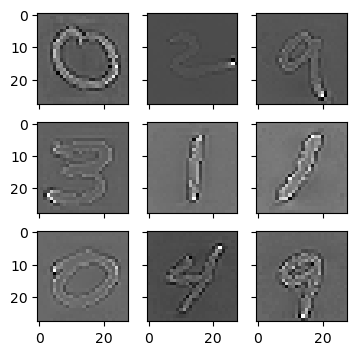

-15.578791 0.031502903 47.641956


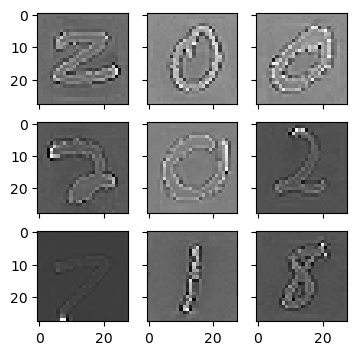

-9.755621 0.0047496553 26.531399


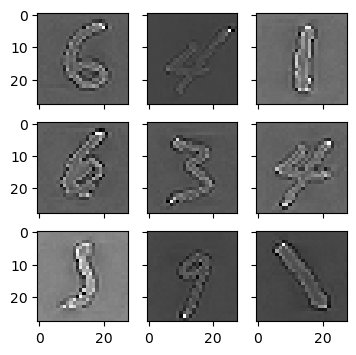

-14.929223 0.0016371846 29.901497


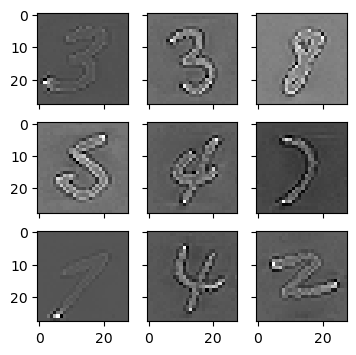

-4.570376 0.010221313 11.380587


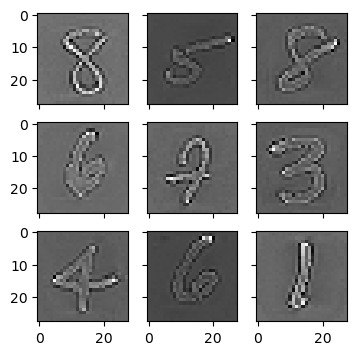

-9.018529 -0.00023007311 17.938961


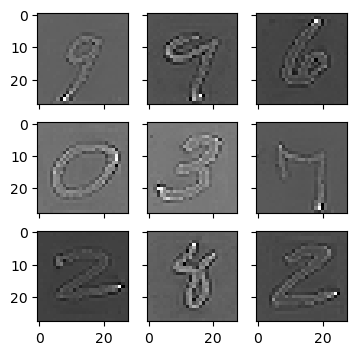

-5.152455 0.014191206 9.5191145


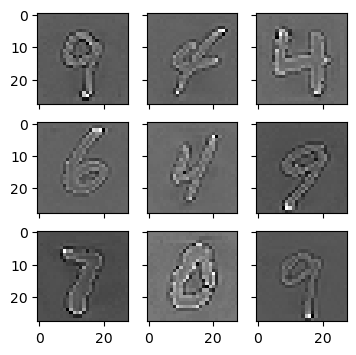

-11.212203 -0.003667254 19.777191


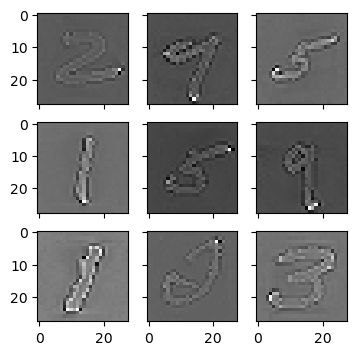

-16.971153 0.008713987 23.759357


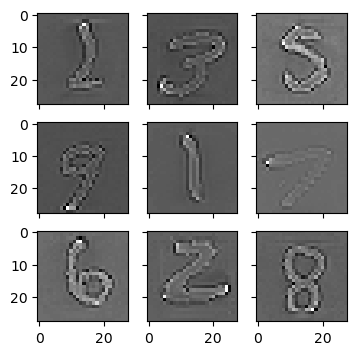

-9.121235 0.0076907477 17.510254


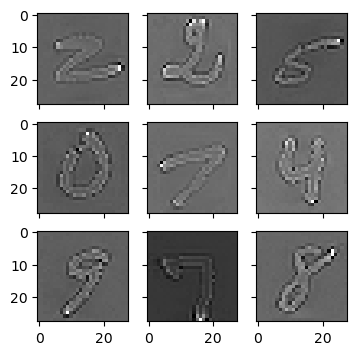

-11.150118 0.0011233209 13.417335


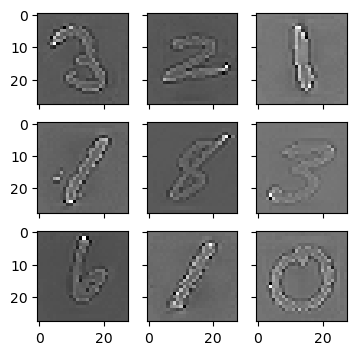

-10.955379 0.010005047 12.174856


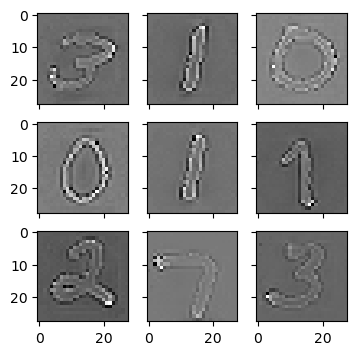

-7.995653 0.018042143 15.999029


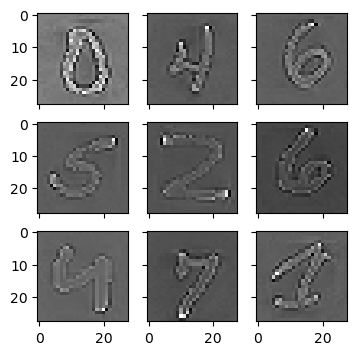

-5.7229333 0.007821145 9.710818


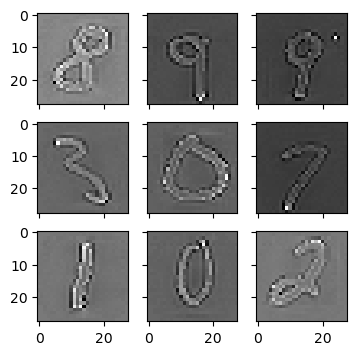

-8.157902 0.010130812 42.746784


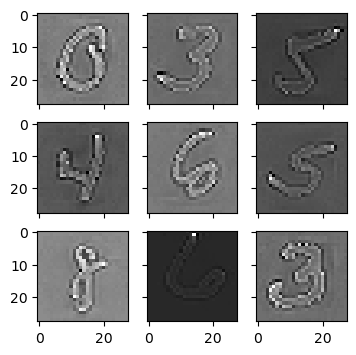

-22.144505 0.012062063 66.872284


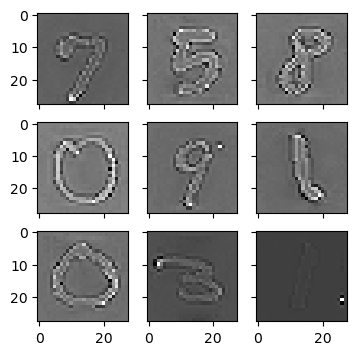

-10.214071 0.009107585 21.131487


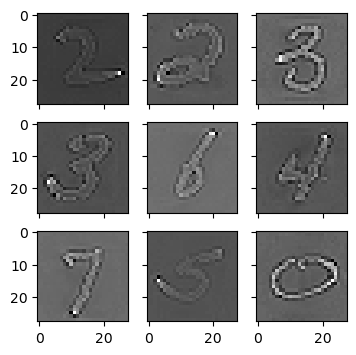

-5.2782445 -0.0018714907 9.093608


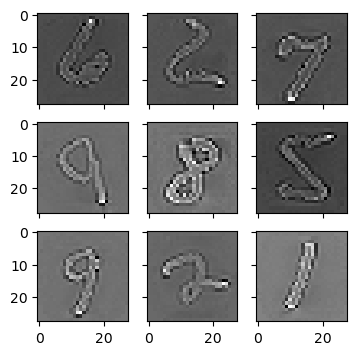

-8.572738 -0.00474238 15.29582


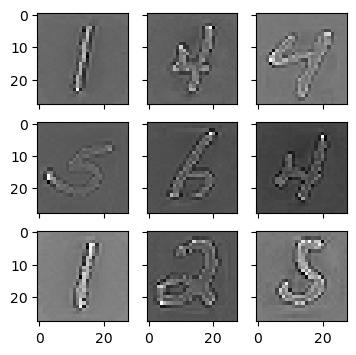

-12.70004 0.019297611 40.670597


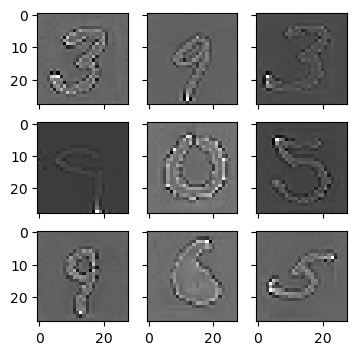

-8.77902 0.007938421 16.249584


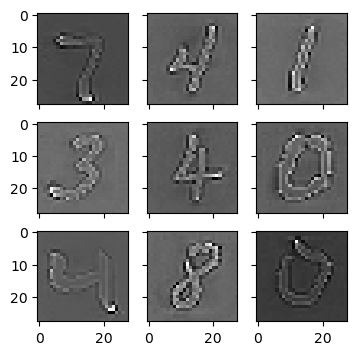

-4.9878464 0.012543765 10.701597


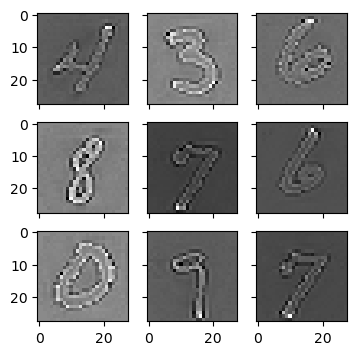

-6.9456854 -0.0030050047 11.301558


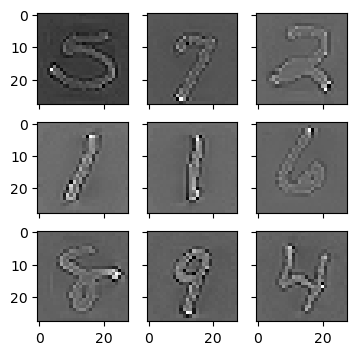

-12.242397 0.010850517 36.546288


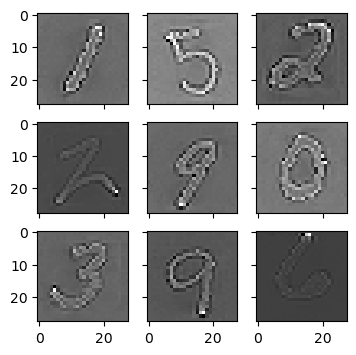

-12.033925 0.018725678 28.298435


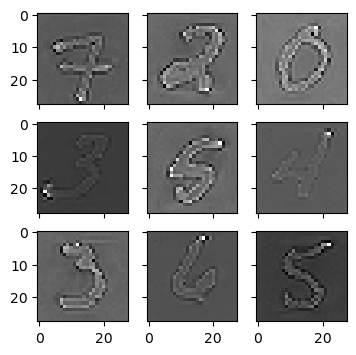

-7.5473337 0.0055366238 13.472274


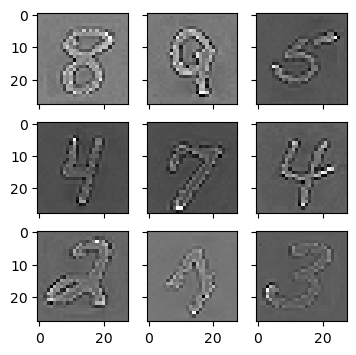

-6.89738 0.0040586945 7.787545


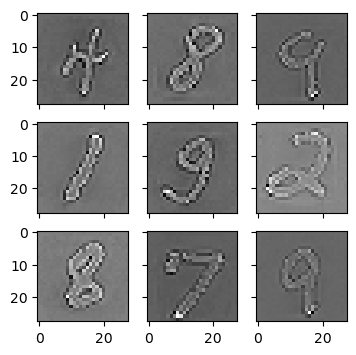

-5.084053 -0.004304385 8.254937


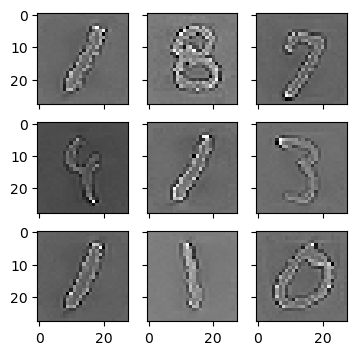

-8.872575 0.011596899 24.94824


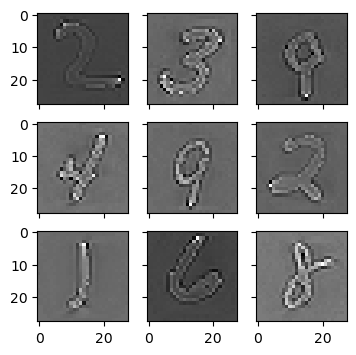

-7.2818694 0.007909308 9.898218


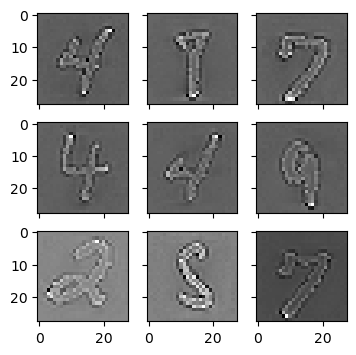

-6.6404424 0.013140033 12.696852


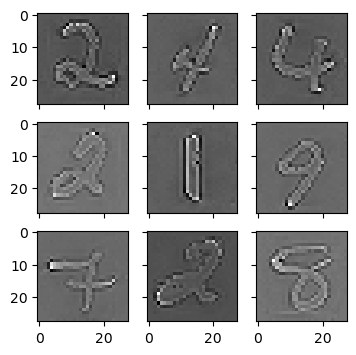

-8.591776 0.0029202907 11.282012


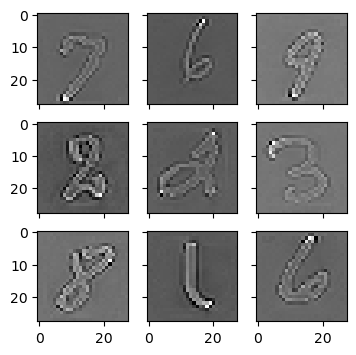

-8.683696 -0.0030776751 15.016937


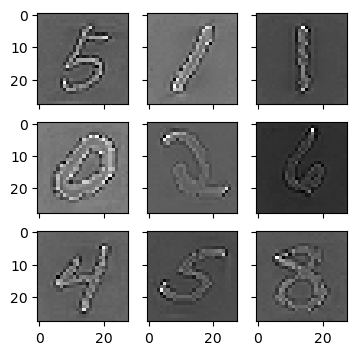

-8.598591 -0.006253071 18.310328


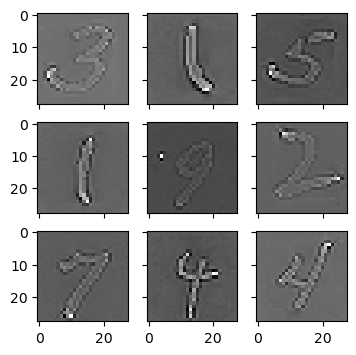

-6.00625 -0.006031328 24.361355


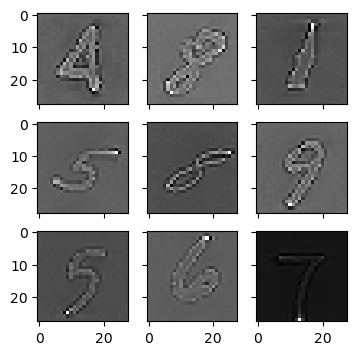

-10.408786 0.0227329 17.91726


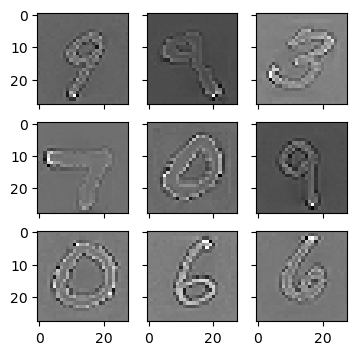

-6.468764 0.0034096523 16.067776


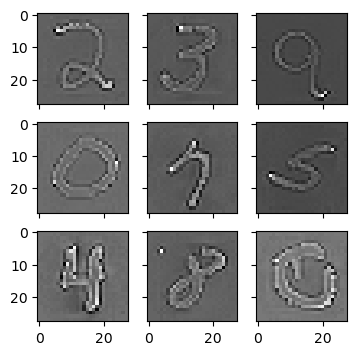

-9.66304 0.00037381277 30.304007


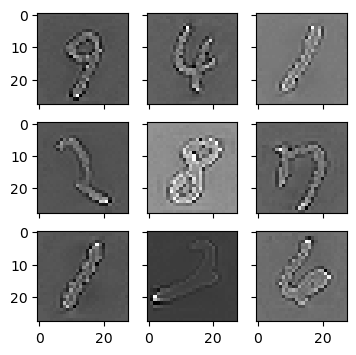

-16.574747 0.029191826 76.87132


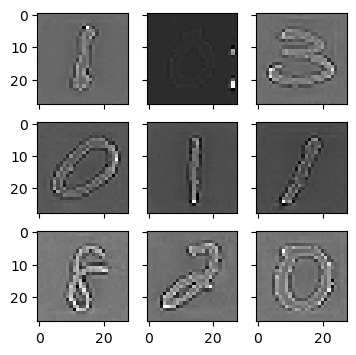

-9.32008 0.011432648 14.697854


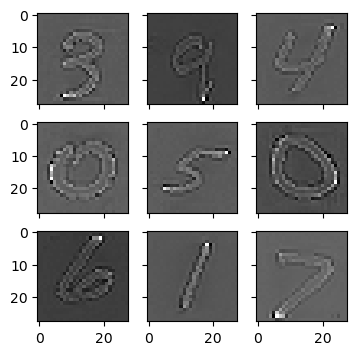

-9.846219 -0.00275847 26.027388


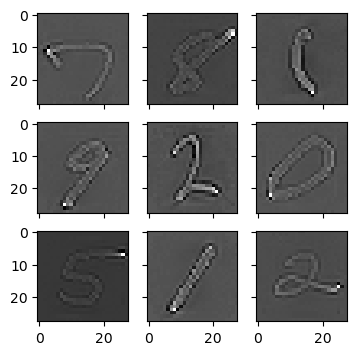

-13.159386 0.0127740195 20.439857


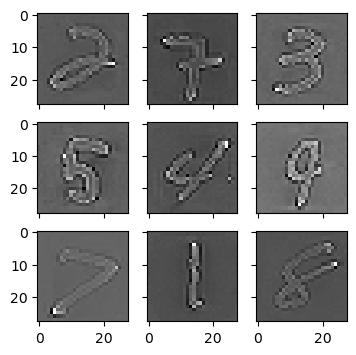

-16.230043 0.008339371 39.29765


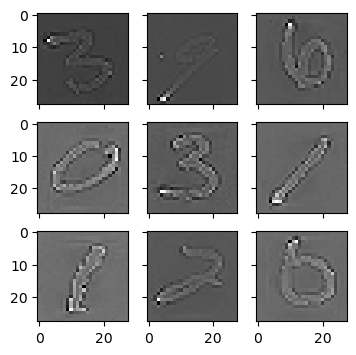

-7.4603686 0.045225844 219.7555


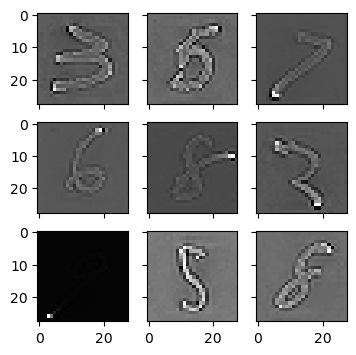

-13.548593 0.015016025 49.807404


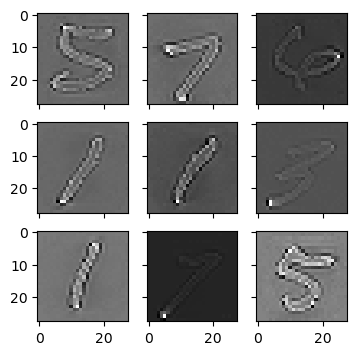

-16.207962 0.00855182 33.60454


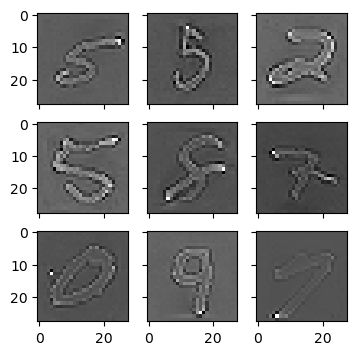

-9.2488 0.0044863657 19.057146


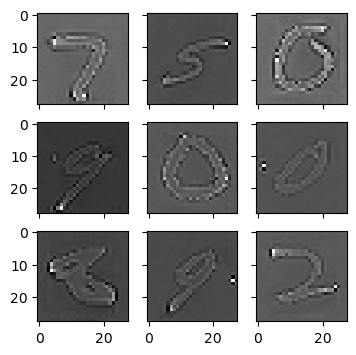

-14.201767 -0.00055264507 40.083782


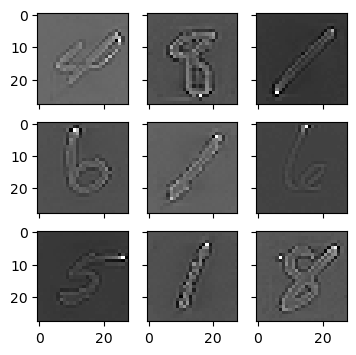

-6.392025 0.0068499953 16.286892


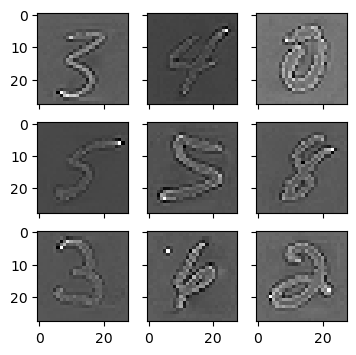

-8.402045 0.013194086 13.876924


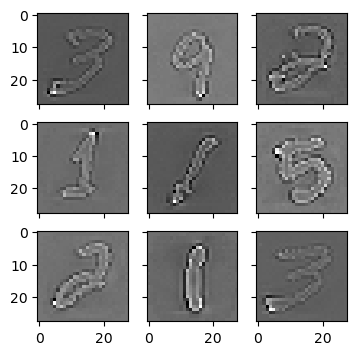

-14.405159 0.0067776367 33.233322


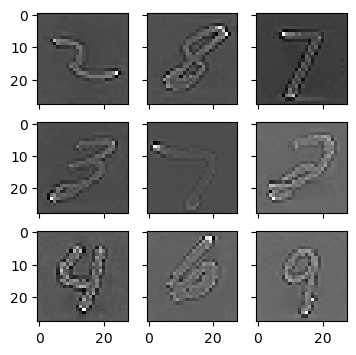

-9.880397 0.0025307538 14.336322


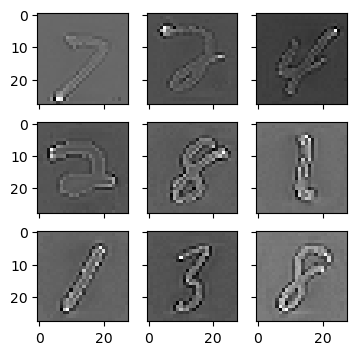

-15.883399 0.0027515583 35.937443


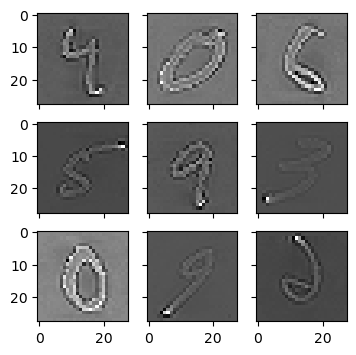

-11.910853 -0.011370702 28.19431


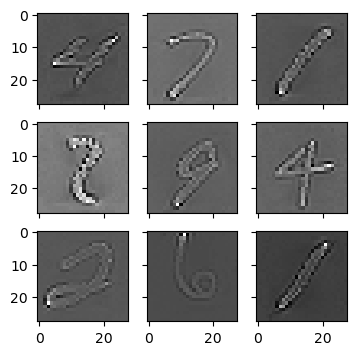

-15.327942 0.004623899 37.110264


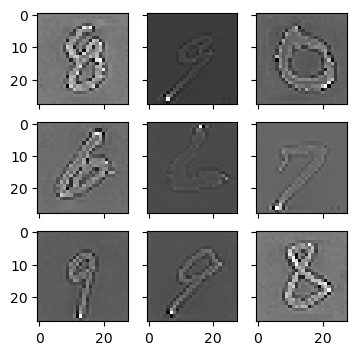

-15.540115 0.006056803 27.283932


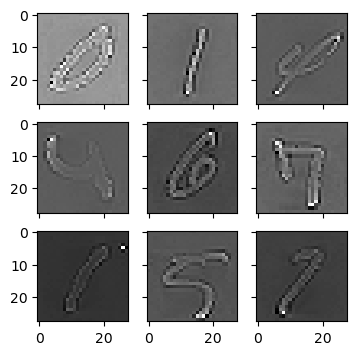

-22.898117 0.029276596 84.475075


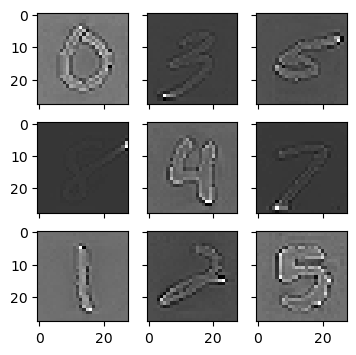

-16.362291 0.027465973 66.466446


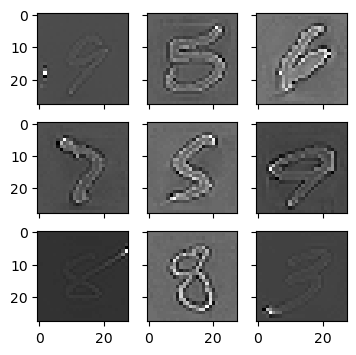

-8.997314 -0.0026963972 23.171144


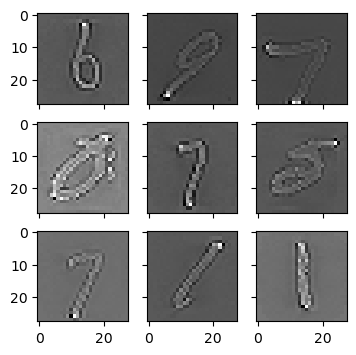

-8.941095 0.020066168 24.32948


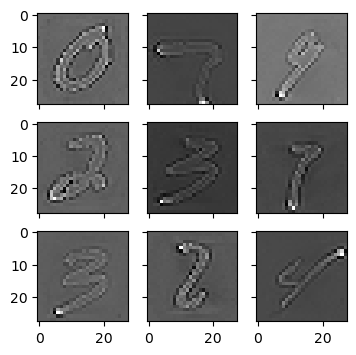

-9.170784 0.0017157636 13.95968


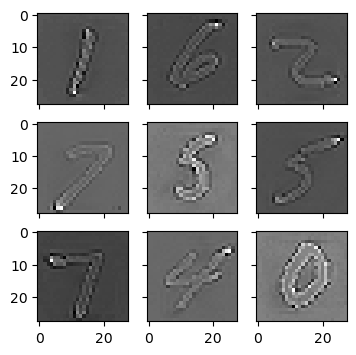

-14.277114 0.008078701 33.527054


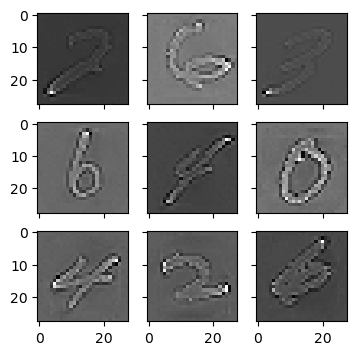

-6.3954244 0.013998992 9.861878


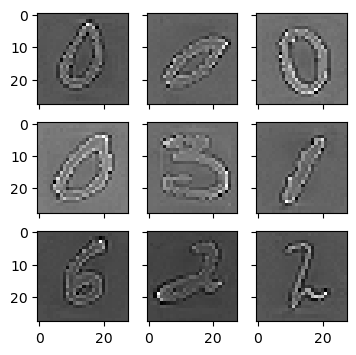

-4.934806 0.0020625792 10.482928


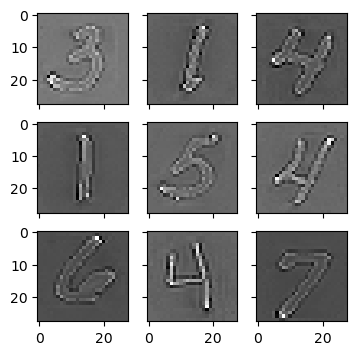

-5.6799636 0.0015507066 13.14627


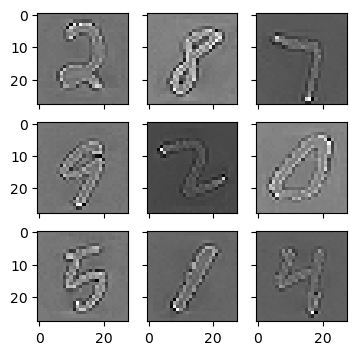

-6.8152924 0.0063019022 10.095838


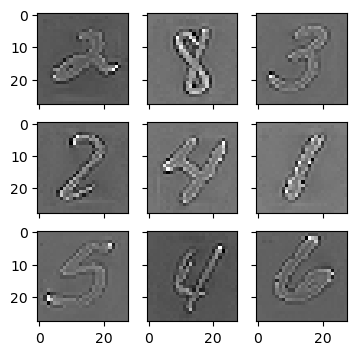

-6.034185 0.010440424 11.963117


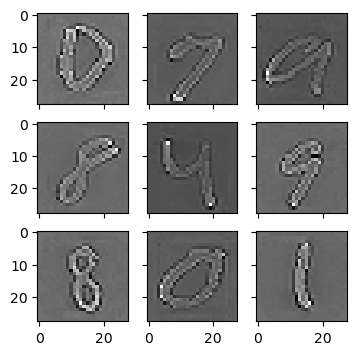

-6.635244 0.023658277 12.32901


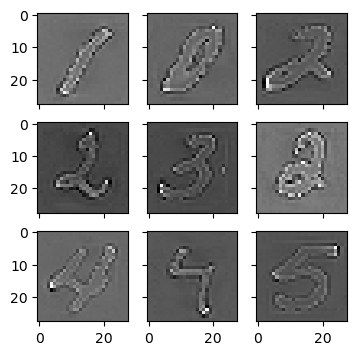

-7.0713143 0.016213378 11.773211


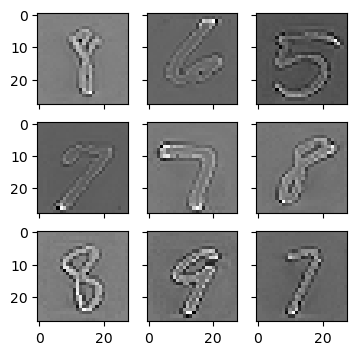

-9.365029 0.031091733 22.632936


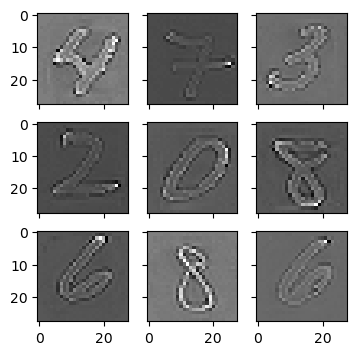

-8.958438 0.0134481685 12.382879


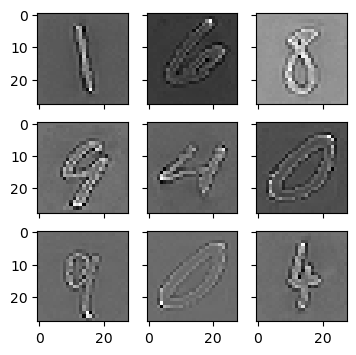

-6.1096635 0.0008647285 11.962769


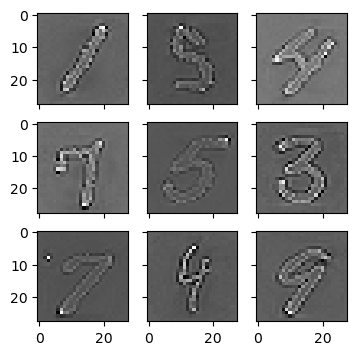

-5.661733 0.033441484 18.213005


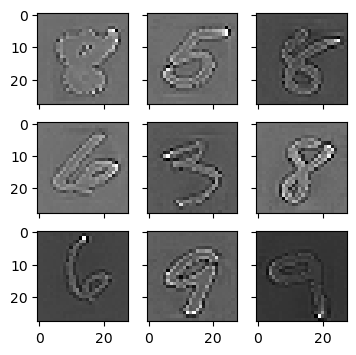

-7.027841 0.028334629 15.19144


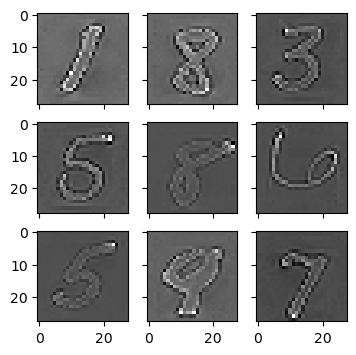

-4.6315346 -0.00051636813 8.017068


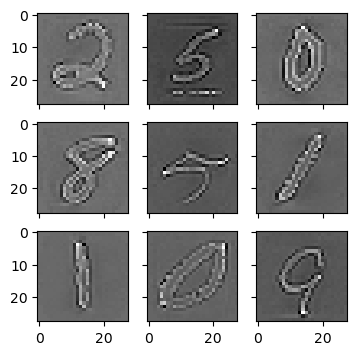

-6.7176023 0.011448767 12.481769


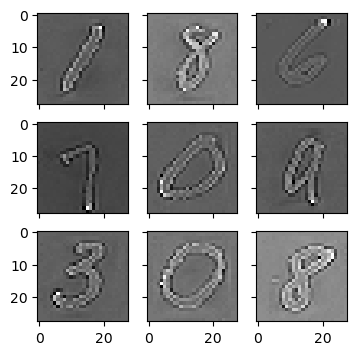

-4.7665257 0.014526482 33.921124


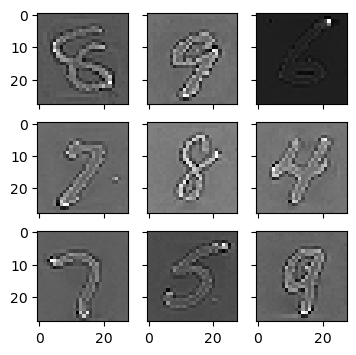

-7.990822 0.0041931453 12.024176


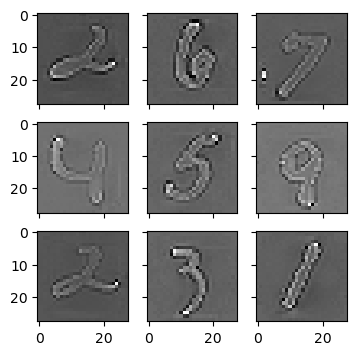

-7.3885956 0.01632863 19.997034


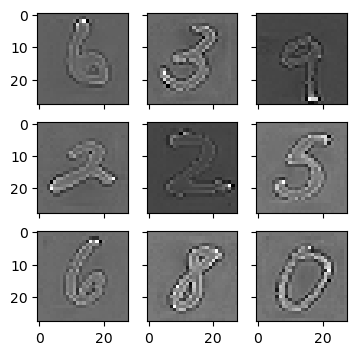

-9.462833 0.009062252 47.258804


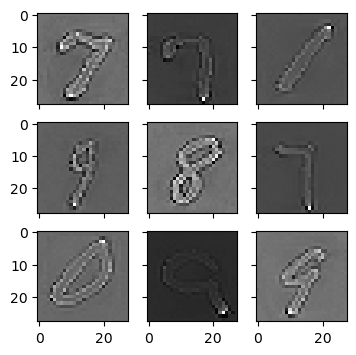

-8.266838 0.0041173506 15.692057


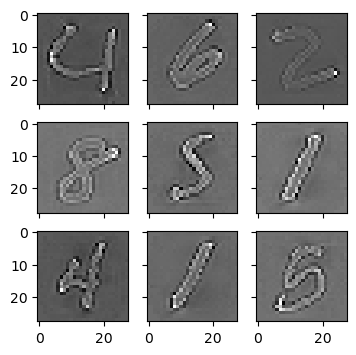

-8.148051 0.0150684845 12.140346


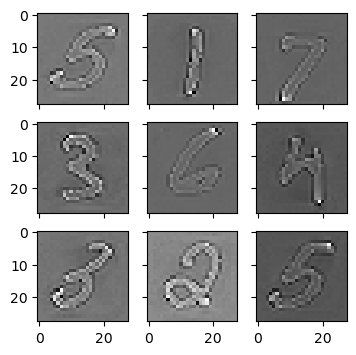

-6.656293 0.010151065 11.181402


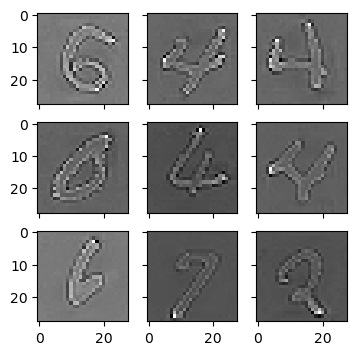

-6.5757413 0.011988116 12.722855


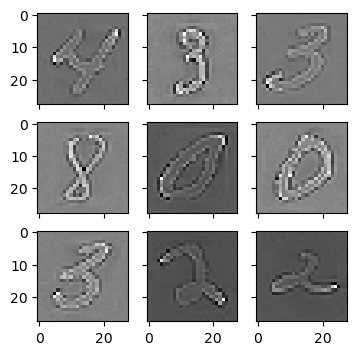

-8.4271145 0.01013082 18.508856


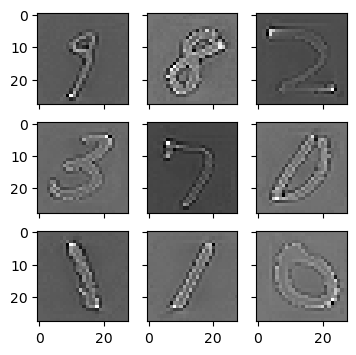

-7.250976 0.023688495 14.910688


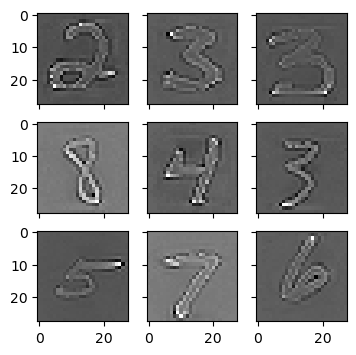

-6.2260723 0.01909102 12.14878


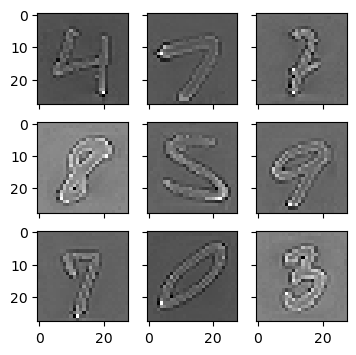

-5.8451552 0.018210951 11.378214


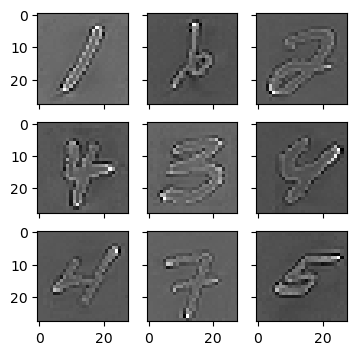

-8.279818 0.010913321 17.707228


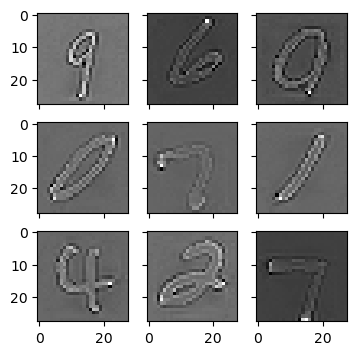

-13.195189 0.012934711 18.707548


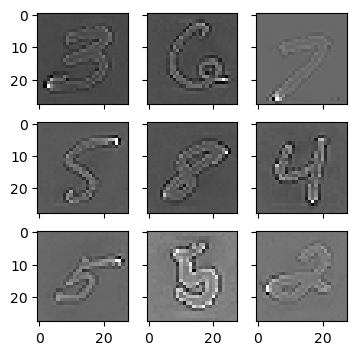

-6.3751564 0.008986421 10.171052


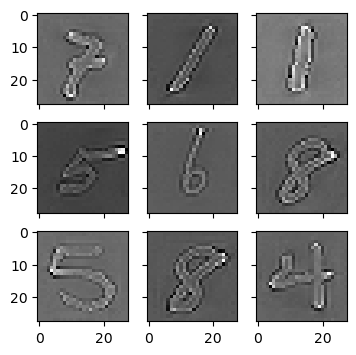

-14.462231 0.0012779236 32.611687


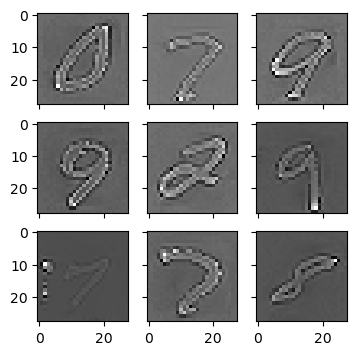

-9.1094675 0.025796479 51.727417


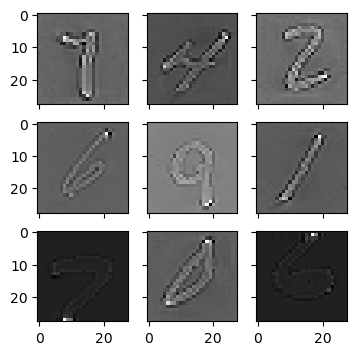

-10.121782 0.0075551257 28.658638


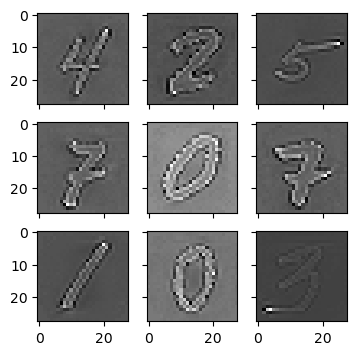

-9.87187 0.010901729 19.750193


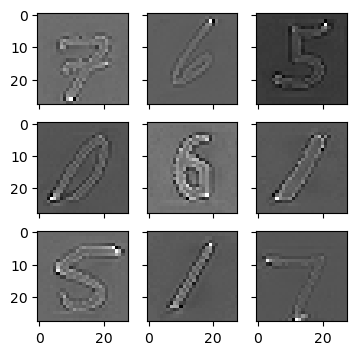

-14.347914 -0.0060301702 35.923496


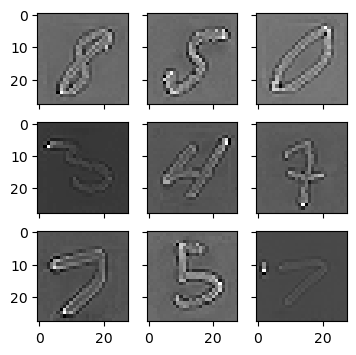

-11.730254 0.019566594 20.322104


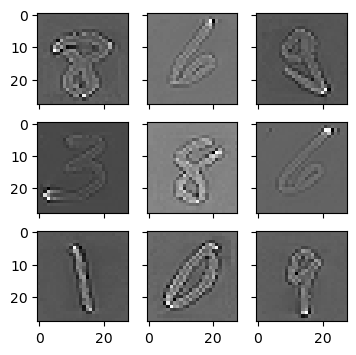

-6.1979194 0.010496076 16.52897


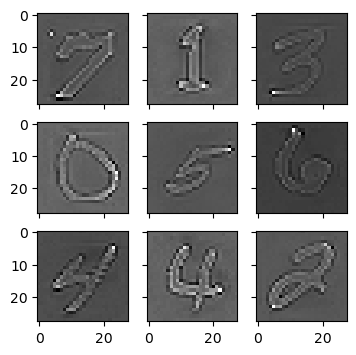

-7.843166 0.010153211 23.959705


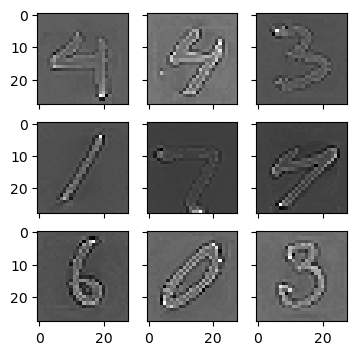

-12.003445 -0.0043297135 20.328524


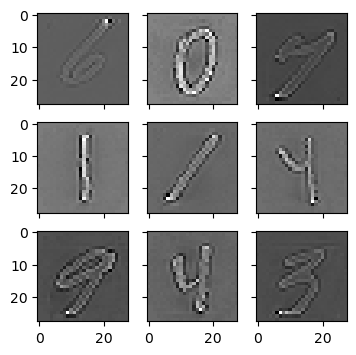

-5.5231795 0.0078017674 16.429787


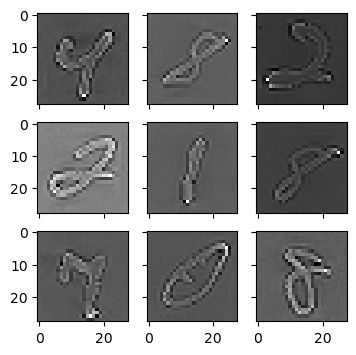

-18.339556 -0.010596913 76.469765


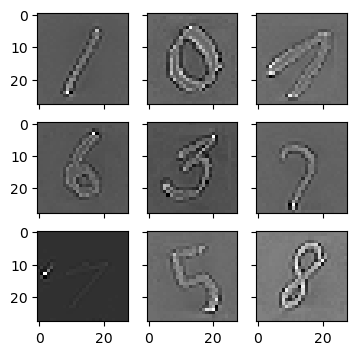

-12.512885 0.010268524 28.323946


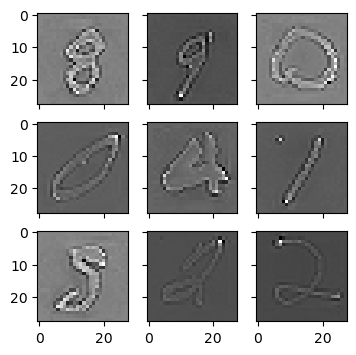

-11.567704 0.016781233 60.36517


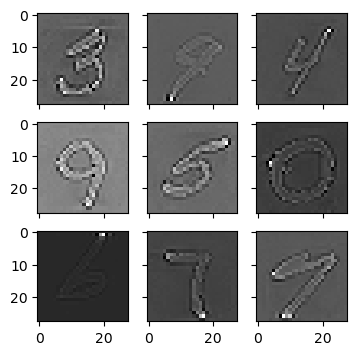

-9.971026 -0.00036588305 23.406029


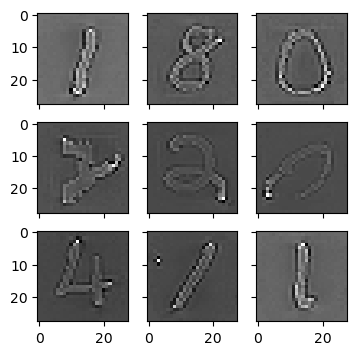

-9.454325 -0.010057324 28.254686


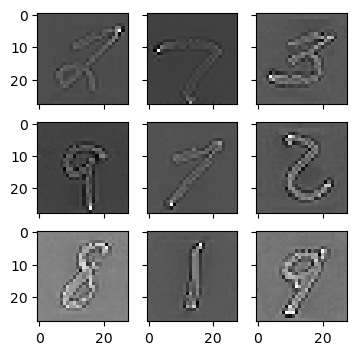

-7.3624697 -0.0019537087 11.984173


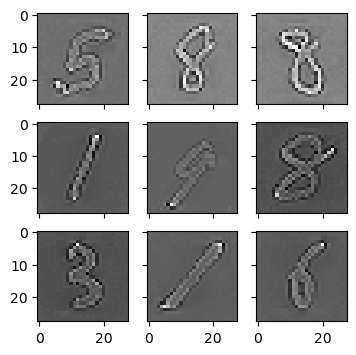

-5.632686 0.0010712903 12.2165


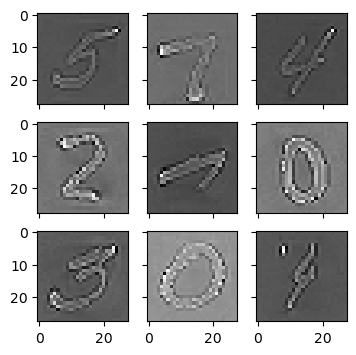

-14.354873 -0.0039799004 47.754265


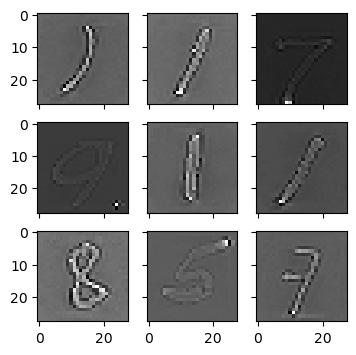

-6.796169 0.009130558 11.583129


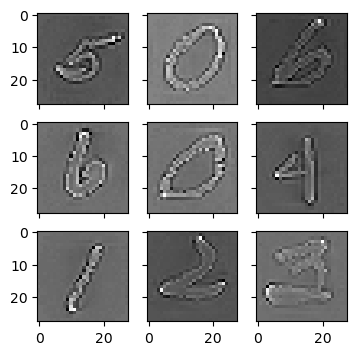

-5.5458117 -0.00048620361 11.203288


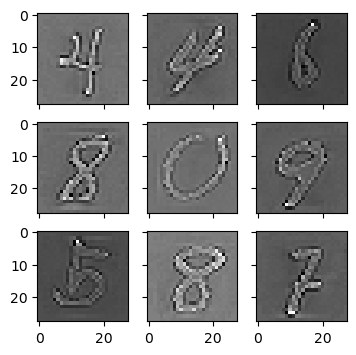

-9.990711 -0.0015558326 23.596708


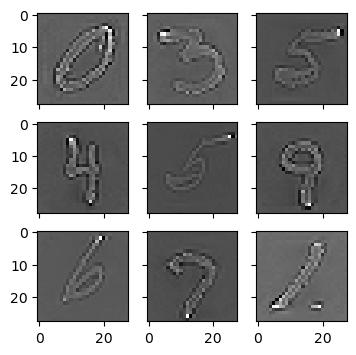

-5.456803 -0.008033989 15.941781


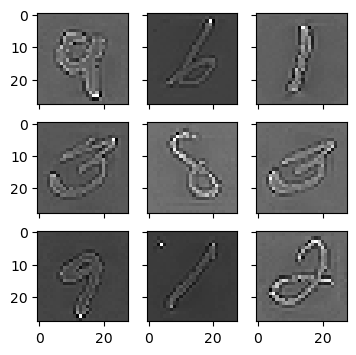

-33.26393 0.0027799855 70.68339


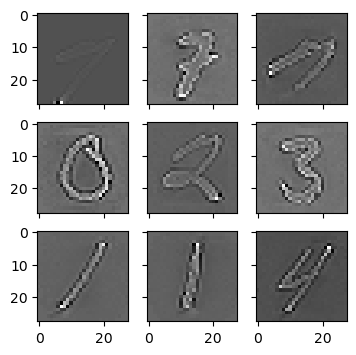

-17.106606 0.013575281 80.30771


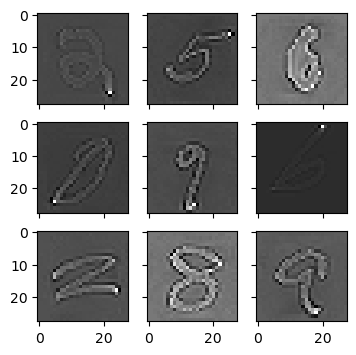

-4.179462 -0.0026826377 5.8455324


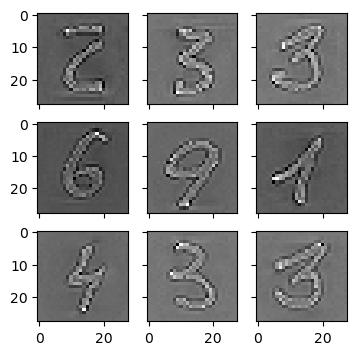

-34.755157 0.023643317 104.12719


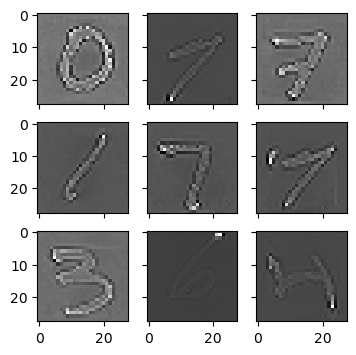

-12.283238 -0.012210632 26.930973


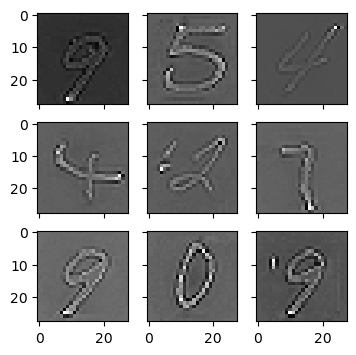

-14.581054 0.004400942 55.195557


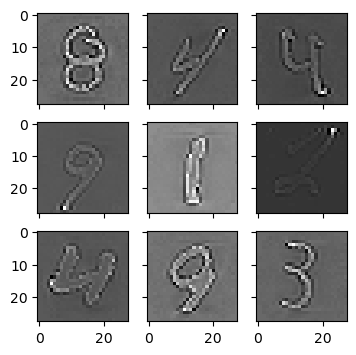

-6.3108006 0.024857417 23.358274


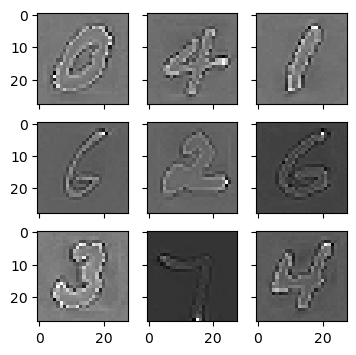

-15.418735 0.02014256 31.679852


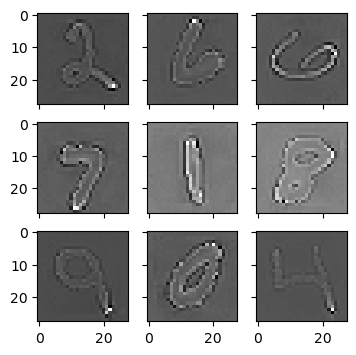

-5.4966707 0.016288243 8.237026


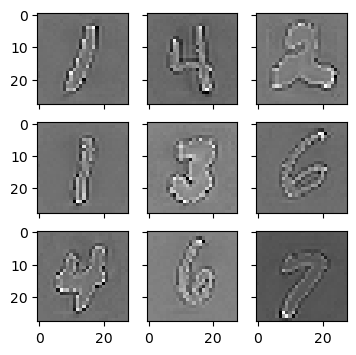

-5.6889453 0.028162483 11.985561


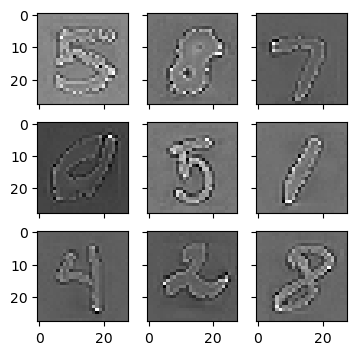

-23.58752 0.03478803 36.836533


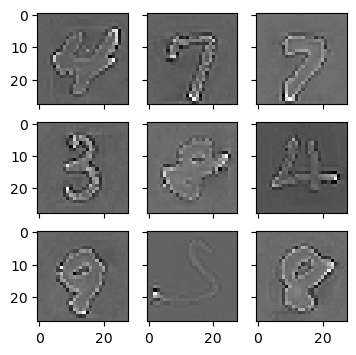

-6.6875267 0.0088619515 8.411254


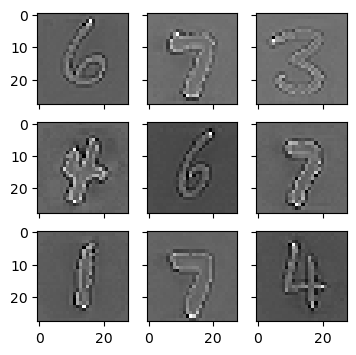

-7.6535244 0.02438276 25.615414


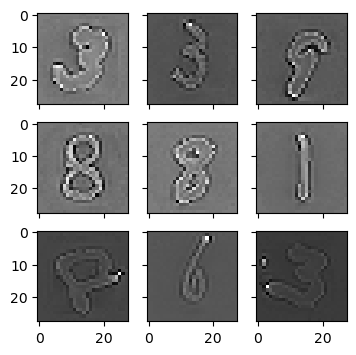

-19.62685 0.027990956 105.59088


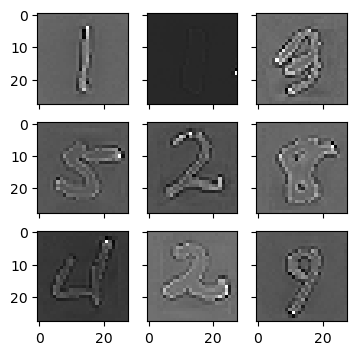

-5.8460402 0.020517904 9.087154


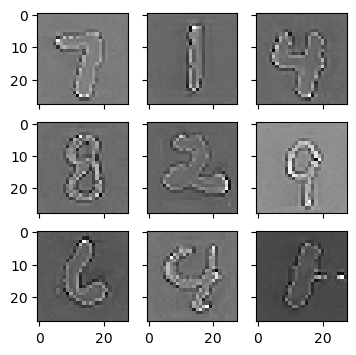

-11.511855 0.058575958 35.260555


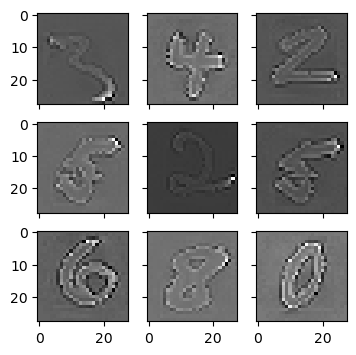

-12.484057 0.03949594 34.741646


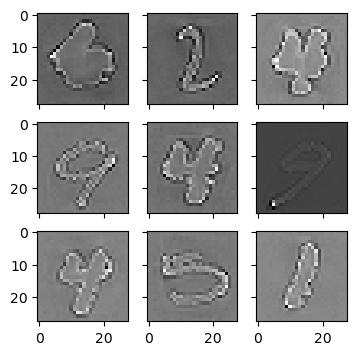

-6.9478817 0.0037965947 10.702161


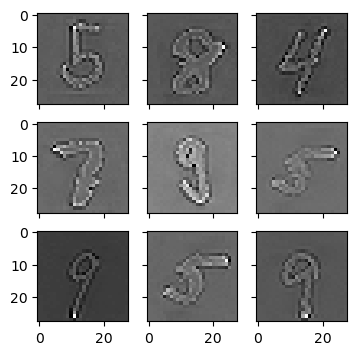

-5.6551347 0.03368689 10.336697


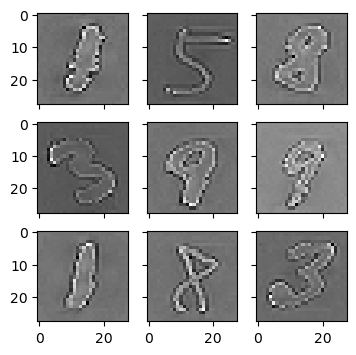

-8.465344 0.021457123 15.4332285


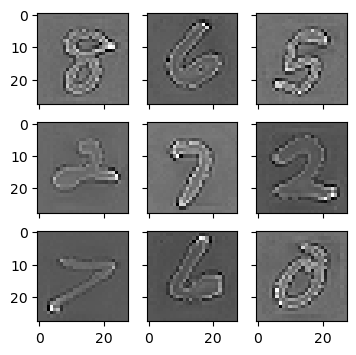

-10.650267 0.03300892 23.677084


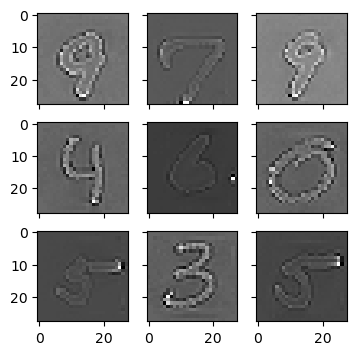

-9.176107 0.09165633 192.01208


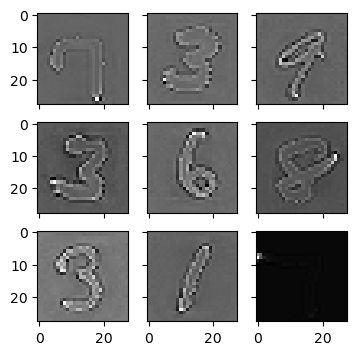

-7.3206677 0.018110245 13.523471


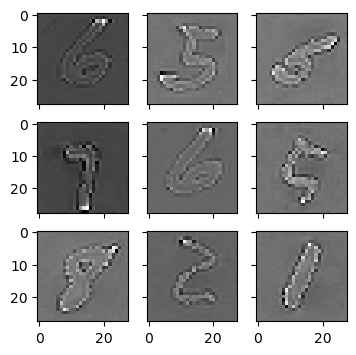

-6.1257696 0.025341207 27.79152


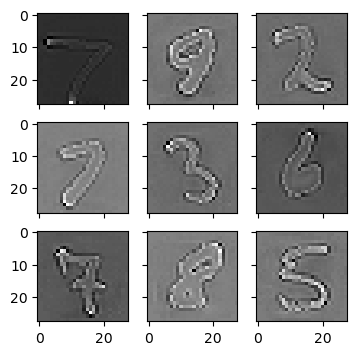

-4.556589 0.015285384 9.116795


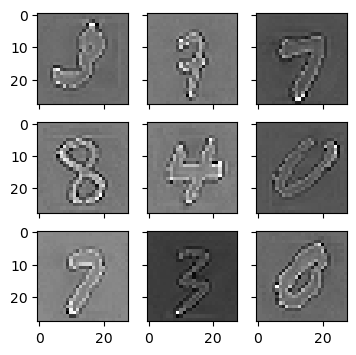

-8.960407 0.020117389 26.422626


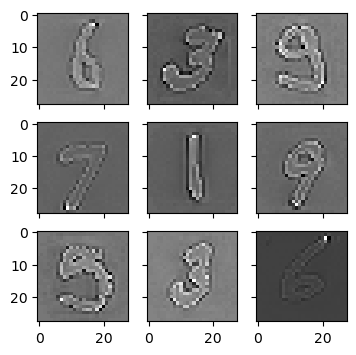

-5.1320257 0.036066156 10.728788


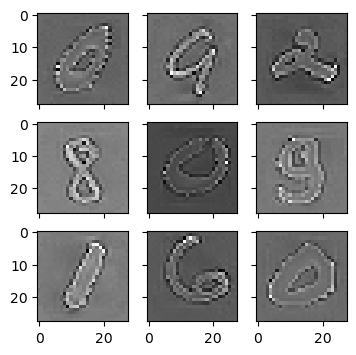

-70.71269 0.034364007 124.84956


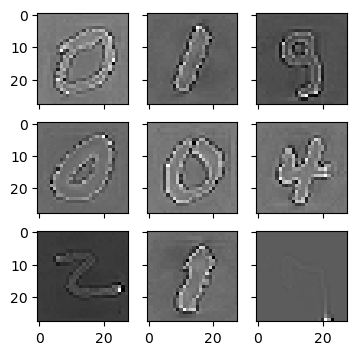

-7.557794 0.027187947 23.670921


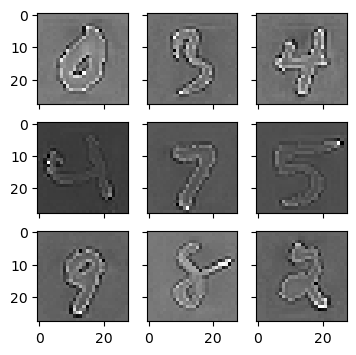

-6.0591717 0.018909328 16.915472


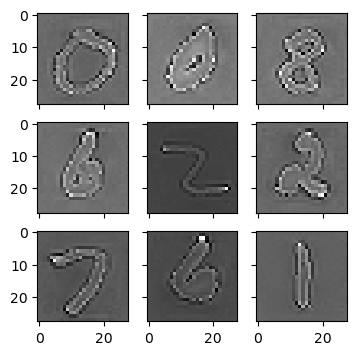

-12.357445 0.04944106 35.71499


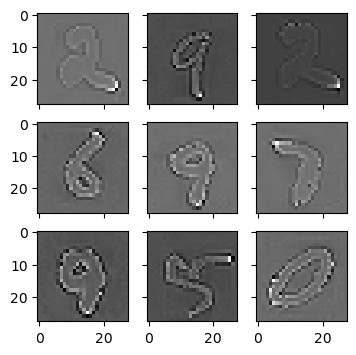

-7.5689225 0.008364187 13.2931385


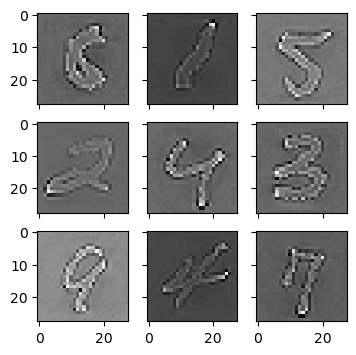

-25.875526 0.024655273 73.22232


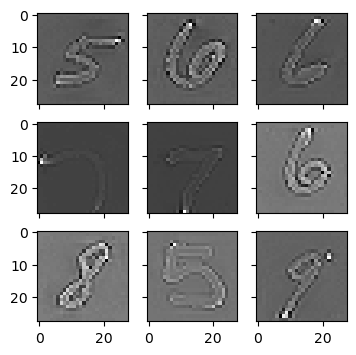

-7.1130323 0.0057011032 13.7040415


KeyboardInterrupt: 

In [10]:
# define data preparation
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zca_whitening=True)
# fit parameters from data
X_mean = X_train.mean(axis=0)
datagen.fit(X_train - X_mean)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train - X_mean, y_train, batch_size=9, shuffle=False):
    print(X_batch.min(), X_batch.mean(), X_batch.max())
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()

## Random Rotations

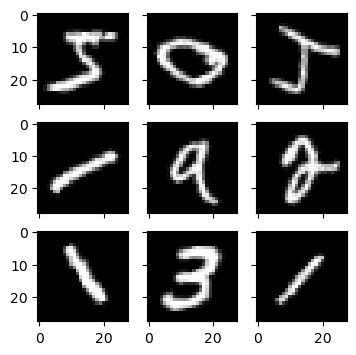

In [11]:
# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

## random shifts

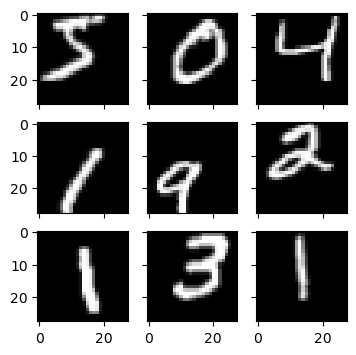

In [12]:
# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

## Random flips

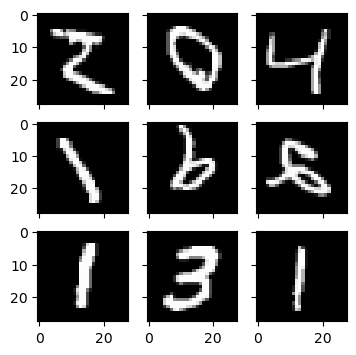

In [13]:
# define data preparation
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, shuffle=False):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4,4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(X_batch[i*3+j].reshape(28,28), cmap=plt.get_cmap("gray"))
    # show the plot
    plt.show()
    break

In [4]:
# You can also use Keras layers
from keras.models import Sequential
from keras.layers import Dense, Input, RandomFlip, RandomRotation, Flatten, BatchNormalization, Dropout
from keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

data_augmentation = Sequential([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.4)
])

# and add data_augmentation as layer to your model

input_layer = Input(shape=(28,28))
aug = data_augmentation(input_layer)
flatten = Flatten()(aug)
hidden_layer1 = Dense(64, activation='leaky_relu')(flatten)
hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
hidden_layer3 = Dense(32, activation='relu')(hidden_layer2)
output_layer = Dense(10, activation='softmax')(hidden_layer3)

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

2024-05-22 19:38:33.891990: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-22 19:38:34.040310: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-22 19:38:34.040362: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-22 19:38:34.043717: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-22 19:38:34.043770: I external/local_xla/xla/stream_executor

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 sequential (Sequential)     (None, 28, 28)            0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330   

# Prevent Overfitting - Batch Normalization

#### Layer that normalizes its inputs. Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1. https://keras.io/api/layers/normalization_layers/batch_normalization/
#### Usually used after Fully Connected or Convolutional layers
#### There are more normalization layers!

In [15]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32') / 255.0 # Rescale pixel values to [0, 1]
X_test = X_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [16]:
input_layer = Input(shape=(28, 28))
flatten = Flatten()(input_layer)
hidden = Dense(256, activation='relu')(flatten)
hidden2 = Dense(128, activation='relu')(hidden)
output_layer = Dense(10, activation='softmax')(hidden2)

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/10


2024-05-15 17:28:49.198909: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f2706a554a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-15 17:28:49.198940: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-05-15 17:28:49.204389: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-15 17:28:49.219467: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1715786929.283229   55665 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1500/1500 [==============================] - 8s 5ms/step - loss: 0.2296 - accuracy: 0.9310 - val_loss: 0.1268 - val_accuracy: 0.9620
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0931 - accuracy: 0.9710 - val_loss: 0.0975 - val_accuracy: 0.9707
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0628 - accuracy: 0.9797 - val_loss: 0.1042 - val_accuracy: 0.9712
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0465 - accuracy: 0.9850 - val_loss: 0.0883 - val_accuracy: 0.9760
Epoch 5/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0370 - accuracy: 0.9878 - val_loss: 0.1121 - val_accuracy: 0.9705
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0298 - accuracy: 0.9897 - val_loss: 0.0935 - val_accuracy: 0.9766
Epoch 7/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0251 - accuracy: 0.9916 - val_loss: 0.1077 - val_accuracy: 0.9732
Epo

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0897 - accuracy: 0.9793
Test Loss: 0.0897144004702568, Test Accuracy: 0.9793000221252441


### with batch normalization:

In [20]:
input_layer = Input(shape=(28, 28))
flatten = Flatten()(input_layer)
hidden = Dense(256, activation='relu')(flatten)
b1 = BatchNormalization(axis=-1, momentum=0.1, epsilon=0.001)(hidden)
hidden2 = Dense(128, activation='relu')(b1)
b2 = BatchNormalization(axis=-1, momentum=0.09, epsilon=0.001)(hidden2)
output_layer = Dense(10, activation='softmax')(b2)

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               200960    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                          

In [21]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [22]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2262 - accuracy: 0.9314 - val_loss: 0.1715 - val_accuracy: 0.9475
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1161 - accuracy: 0.9637 - val_loss: 0.1764 - val_accuracy: 0.9486
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0886 - accuracy: 0.9724 - val_loss: 0.1077 - val_accuracy: 0.9673
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0715 - accuracy: 0.9769 - val_loss: 0.1329 - val_accuracy: 0.9616
Epoch 5/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0580 - accuracy: 0.9816 - val_loss: 0.0987 - val_accuracy: 0.9714
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0518 - accuracy: 0.9831 - val_loss: 0.0904 - val_accuracy: 0.9745
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0434 - accuracy: 0.9853 - val_loss: 0.1073 - val_accurac

In [23]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

313/313 [==============================] - 1s 4ms/step - loss: 0.1255 - accuracy: 0.9691
Test Loss: 0.12551406025886536, Test Accuracy: 0.9690999984741211


## Dropout

#### increases generalization

In [25]:
input_layer = Input(shape=(28, 28))
flatten = Flatten()(input_layer)
hidden = Dense(256, activation='relu')(flatten)
drop1 = Dropout(0.2)(hidden)
hidden2 = Dense(128, activation='relu')(drop1)
drop2 = Dropout(0.2)(hidden2)
output_layer = Dense(10, activation='softmax')(drop2)

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 10)                1290

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 9s 5ms/step - loss: 0.2864 - accuracy: 0.9151 - val_loss: 0.1384 - val_accuracy: 0.9574
Epoch 2/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1282 - accuracy: 0.9609 - val_loss: 0.1013 - val_accuracy: 0.9678
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0985 - accuracy: 0.9692 - val_loss: 0.0945 - val_accuracy: 0.9719
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0796 - accuracy: 0.9753 - val_loss: 0.0840 - val_accuracy: 0.9753
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0698 - accuracy: 0.9777 - val_loss: 0.0803 - val_accuracy: 0.9762
Epoch 6/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0582 - accuracy: 0.9814 - val_loss: 0.0837 - val_accuracy: 0.9776
Epoch 7/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0544 - accuracy: 0.9820 - val_loss: 0.0871 - val_accuracy:

In [28]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0782 - accuracy: 0.9823
Test Loss: 0.07815255969762802, Test Accuracy: 0.9822999835014343


## Early stopping

#### prevent overfitting and save resources

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
early_stopping = EarlyStopping(monitor= 'val_loss', patience=3, restore_best_weights=True)

In [31]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0409 - accuracy: 0.9866 - val_loss: 0.0958 - val_accuracy: 0.9778
Epoch 2/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0373 - accuracy: 0.9881 - val_loss: 0.0966 - val_accuracy: 0.9772
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0348 - accuracy: 0.9886 - val_loss: 0.0874 - val_accuracy: 0.9809
Epoch 4/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0326 - accuracy: 0.9887 - val_loss: 0.1002 - val_accuracy: 0.9773
Epoch 5/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0330 - accuracy: 0.9894 - val_loss: 0.0931 - val_accuracy: 0.9783
Epoch 6/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0313 - accuracy: 0.9894 - val_loss: 0.1019 - val_accuracy: 0.9795


In [32]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

313/313 [==============================] - 1s 4ms/step - loss: 0.0853 - accuracy: 0.9804
Test Loss: 0.08528850972652435, Test Accuracy: 0.980400025844574


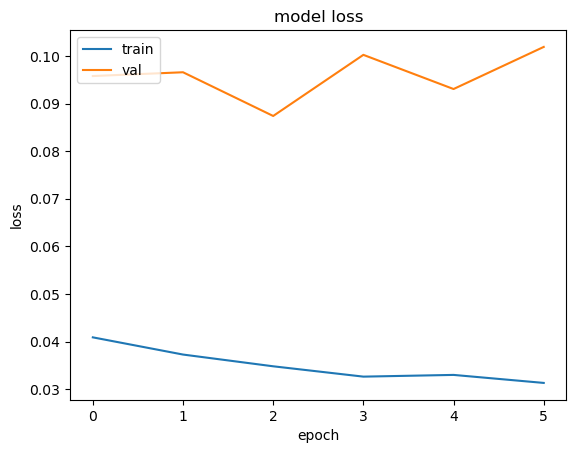

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

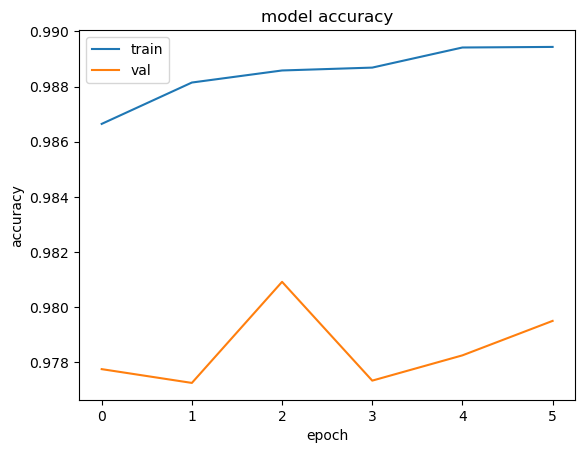

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Save model

In [35]:
model.save('save.keras')
model.save('save.h5')

In [36]:
# Export the model as a SavedModel artifact in a filepath.
model.export("exported_model")

INFO:tensorflow:Assets written to: exported_model/assets


INFO:tensorflow:Assets written to: exported_model/assets


Saved artifact at 'exported_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='input_4')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  139809572568528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139809572568336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139809288825424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139809577213904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139809572555472: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139809572561616: TensorSpec(shape=(), dtype=tf.resource, name=None)


# Read model

In [37]:
from keras.models import load_model
# Wczytanie modelu
new_model = load_model('save.h5')

# Predykcja
predictions = new_model.predict(X_test)
print(np.argmax(predictions, axis=1))

313/313 [==============================] - 1s 2ms/step
[7 2 1 ... 4 5 6]


In [ ]:
#callbacks API - checkpoints

# Build a classifiction model on augmented MNIST dataset. Apply augmentation yourself or use provided one.

In [30]:
from keras.models import Sequential
from keras.layers import RandomCrop, RandomZoom

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32') / 255.0 # Rescale pixel values to [0, 1]
X_test = X_test.astype('float32') / 255.0

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [31]:
data_augmentation = Sequential([
  RandomFlip("horizontal_and_vertical"),
  RandomRotation(0.4),
  RandomCrop(20,20),
  RandomZoom(0.2)
])

In [32]:
input_layer = Input(shape=(28,28))
aug = data_augmentation(input_layer)
flatten = Flatten()(aug)
hidden_layer1 = Dense(64, activation='leaky_relu')(flatten)
hidden_layer2 = Dense(32, activation='relu')(hidden_layer1)
hidden_layer3 = Dense(32, activation='relu')(hidden_layer2)
output_layer = Dense(10, activation='softmax')(hidden_layer3)

model = Model(inputs=input_layer, outputs=output_layer)
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 sequential_5 (Sequential)   (20, 20, 28)              0         
                                                                 
 flatten_6 (Flatten)         (20, 560)                 0         
                                                                 
 dense_32 (Dense)            (20, 64)                  35904     
                                                                 
 dense_33 (Dense)            (20, 32)                  2080      
                                                                 
 dense_34 (Dense)            (20, 32)                  1056      
                                                                 
 dense_35 (Dense)            (20, 10)                  330 

In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
early_stopping = EarlyStopping(monitor= 'val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=20, verbose=1, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/50


2024-05-22 19:45:50.277822: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: model_8/sequential_5/random_crop_3/cond/branch_executed/_26


2396/2400 [============================>.] - ETA: 0s - loss: 2.2951 - accuracy: 0.1259

2024-05-22 19:46:11.582752: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:933] Skipping loop optimization for Merge node with control input: model_8/sequential_5/random_crop_3/cond/branch_executed/_10


2400/2400 [==============================] - 24s 10ms/step - loss: 2.2951 - accuracy: 0.1259 - val_loss: 2.0612 - val_accuracy: 0.2625
Epoch 2/50
2400/2400 [==============================] - 23s 10ms/step - loss: 2.2871 - accuracy: 0.1333 - val_loss: 1.9514 - val_accuracy: 0.3470
Epoch 3/50
2400/2400 [==============================] - 22s 9ms/step - loss: 2.2862 - accuracy: 0.1390 - val_loss: 1.8970 - val_accuracy: 0.3611
Epoch 4/50
2400/2400 [==============================] - 22s 9ms/step - loss: 2.2833 - accuracy: 0.1404 - val_loss: 1.9396 - val_accuracy: 0.3742
Epoch 5/50
2400/2400 [==============================] - 22s 9ms/step - loss: 2.2838 - accuracy: 0.1384 - val_loss: 1.8986 - val_accuracy: 0.3549
Epoch 6/50
2400/2400 [==============================] - 22s 9ms/step - loss: 2.2807 - accuracy: 0.1410 - val_loss: 1.8944 - val_accuracy: 0.3916
Epoch 7/50
2400/2400 [==============================] - 22s 9ms/step - loss: 2.2816 - accuracy: 0.1403 - val_loss: 1.8840 - val_accuracy: 0